In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from specim.specfuncs import spec1d

In [2]:
data =  spec1d.Spec1d('../0712_G0594_001_1d_wav_calb.txt')
lamda_galaxy = data['wav']
spectra_galaxy = data['flux']
variance_spectra_galaxy = data['var']
sky_spectra_galaxy = data['sky']


Reading spectrum from ../0712_G0594_001_1d_wav_calb.txt
Expected file format: text
 Spectrum Start:  4317.16
 Spectrum End:     9335.70
 Dispersion (1st pixel):   2.30
 Dispersion (average):      2.45



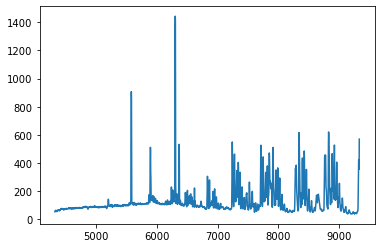

In [3]:
#%matplotlib notebook
plt.plot(lamda_galaxy, sky_spectra_galaxy)
#plt.plot(lamda_galaxy, variance_spectra_galaxy)

In [4]:
#sky_lines = [ (7333.03, 7348.06), (8879.94, 8899.87), (8915.34, 8940.39), ] 
#(5186.75, 5207.72),(5879.13, 5908.45),(7265.32, 7296.05),(8328.04, 8371.00),(6819.47, 6852.06) 
#(6815.47, 6851.41),
#(7266.24, 7293.46),(7738.02, 7765.58),(7227.58, 7263.71),  (7507.11, 7546.68), (7701.14, 7737.80),

In [5]:
sky_lines = [(5567.15, 5586.45), (6291.53, 6316.31), (6855.08, 6876.96), (7305.00, 7323.11),
             (7782.63, 7799.94), (7983.09, 8001.11), (8388.39, 8405.85), (8455.80, 8476.00), 
             (8953.38, 8975.14)]
#(8420.59, 8443.18), (7812.04, 7829.74),  (8015.38, 8032.82),  (6352.79, 6376.49), (8455.80, 8476.00), 

In [6]:
exact_sky_lines = []
index = []
for i,p in enumerate(sky_lines):
    a = abs(lamda_galaxy - p[0])
    b = abs(lamda_galaxy - p[1])
    a_list = a.tolist()
    b_list = b.tolist()
    start = lamda_galaxy[a_list.index(min(a))]
    stop = lamda_galaxy[b_list.index(min(b))]
    exact_sky_lines.append((start, stop))
    index.append((a_list.index(min(a)), b_list.index(min(b))))

In [7]:
print("sky_lines : \n")
[print(*line) for line in sky_lines]
print("\nexact_sky_lines : \n")
[print(*line) for line in exact_sky_lines]

sky_lines : 

5567.15 5586.45
6291.53 6316.31
6855.08 6876.96
7305.0 7323.11
7782.63 7799.94
7983.09 8001.11
8388.39 8405.85
8455.8 8476.0
8953.38 8975.14

exact_sky_lines : 

5567.14 5586.61
6291.37 6315.94
6854.78 6876.95
7305.89 7323.16
7782.64 7799.96
7983.23 8000.58
8388.44 8405.9
8455.83 8475.81
8953.38 8976.16


[None, None, None, None, None, None, None, None, None]

In [8]:
# empty list to contain data of these sky lines 
data_sky_line = []           
lamda_sky_line = [] 

In [9]:
lam_list = lamda_galaxy.tolist()                   # converting array to list
sky_spec_list = sky_spectra_galaxy.tolist()   # contains variance on spectra data

for i,p in enumerate(exact_sky_lines):
    start = lam_list.index(p[0])
    stop  = lam_list.index(p[1])
    sky_spec = sky_spec_list[start:stop+1]   # slicing and collecting data for the wavelength range
    lam = lam_list[start:stop+1]
    data_sky_line.append(sky_spec)
    lamda_sky_line.append(lam)

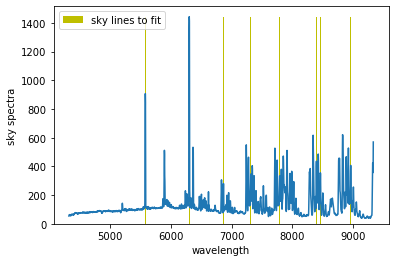

In [10]:
s = np.zeros(len(lamda_sky_line))
w = np.zeros(len(lamda_sky_line))
for i,p in enumerate(lamda_sky_line):
    s[i]= np.median(p)
    w[i]= len(p)

plt.plot(lamda_galaxy, sky_spectra_galaxy)
plt.bar(s, height=max(sky_spectra_galaxy), width=w, color='y', label='sky lines to fit')
plt.xlabel('wavelength')
plt.ylabel('sky spectra')
plt.legend()
plt.show()

In [11]:
model_gauss = models.Gaussian1D()           # calling the Gaussian model 
fitter_gauss = fitting.LevMarLSQFitter()    # Calling the fitting scheme 

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean               stddev      
    ------------------ -------------------- ------------------
    2.0544937961732512 -0.03766952147070127 3.3717740285527884


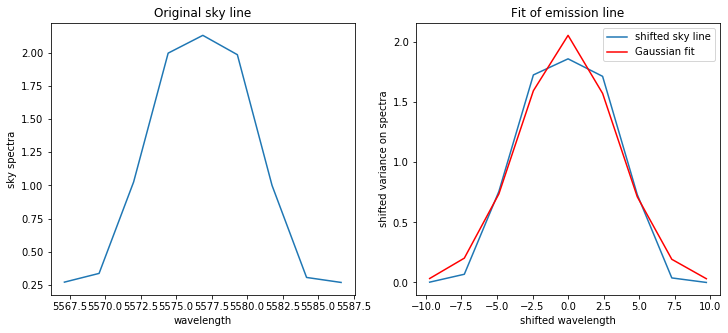

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ----------------- ------------------- ------------------
    6.375652030472886 -2.1652396243532728 3.5035236199933677


<Figure size 432x288 with 0 Axes>

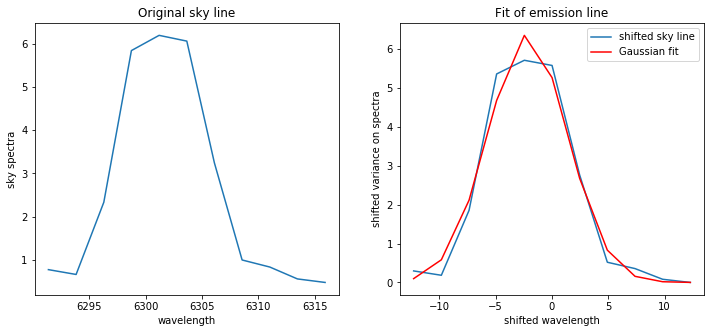

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    1.6036605723612833 -0.7421443898734584 3.752428299479084


<Figure size 432x288 with 0 Axes>

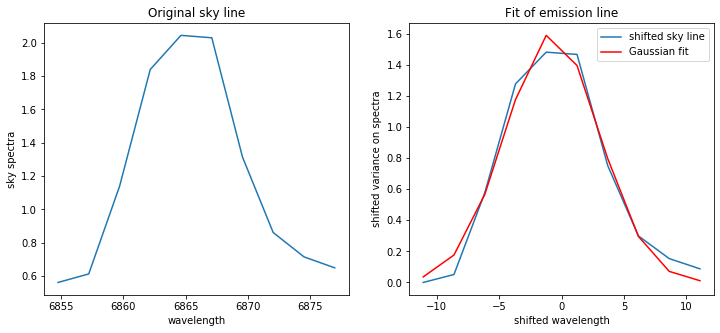

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean             stddev     
    ------------------ ----------------- -----------------
    1.0998283508895232 1.376777333387541 3.463308385341685


<Figure size 432x288 with 0 Axes>

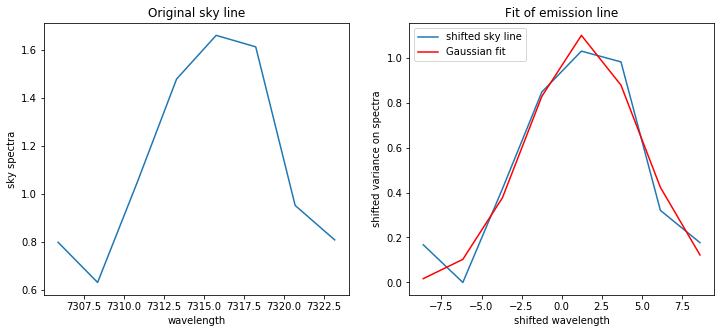

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev      
    ------------------ ------------------ ------------------
    0.9525729797099336 0.7667451537640712 3.5985068212354605


<Figure size 432x288 with 0 Axes>

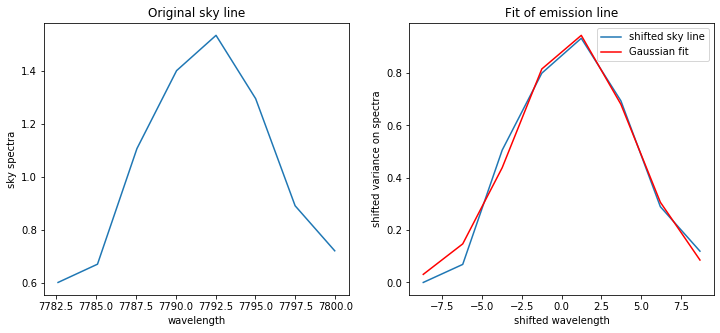

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    1.0782918521646034 -0.9053278106236994 3.7990800417637134


<Figure size 432x288 with 0 Axes>

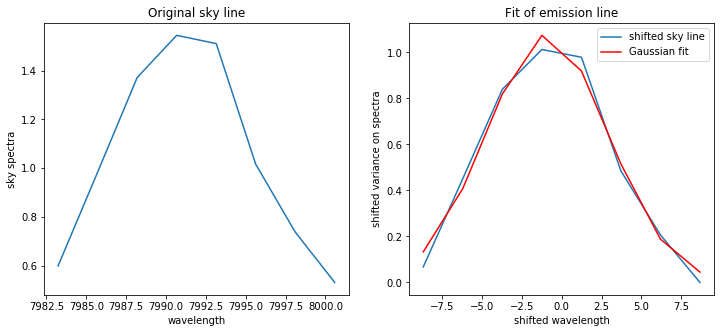

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    1.2288738318970964 0.37135901382771497 3.949005019695252


<Figure size 432x288 with 0 Axes>

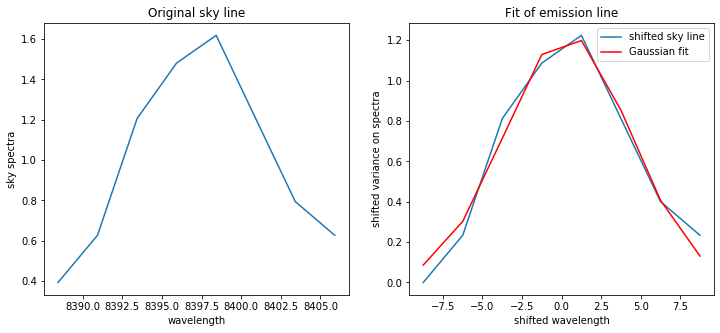

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev      
    ------------------ ------------------- ------------------
    1.2100298067524464 -1.9993125611788471 4.2119069124271675


<Figure size 432x288 with 0 Axes>

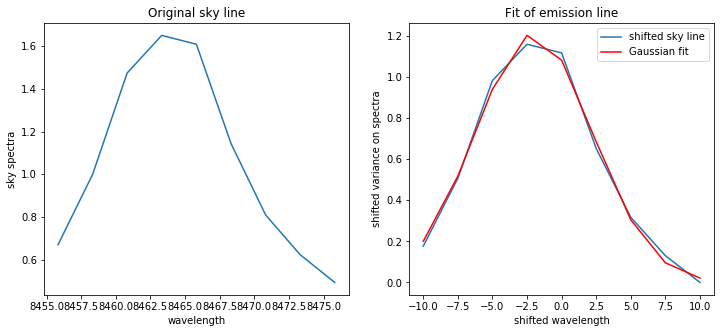

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude              mean              stddev     
    ------------------ ------------------- -----------------
    1.3095538124854544 -1.5587863041555579 3.992159653904978


<Figure size 432x288 with 0 Axes>

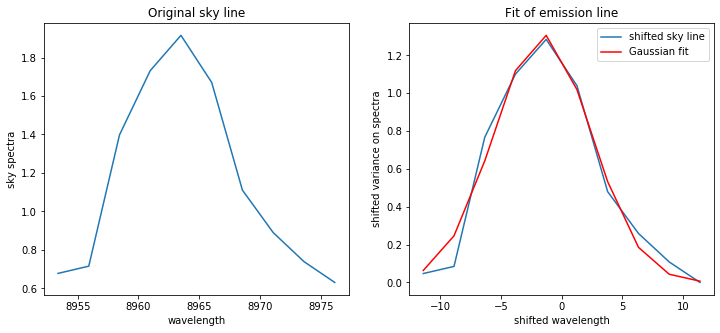

<Figure size 432x288 with 0 Axes>

In [12]:
best_fit = []
for i,p in enumerate(data_sky_line):
    data_sky_line[i] = data_sky_line[i] / np.median(data_sky_line[i])
    x= lamda_sky_line[i] - np.median(lamda_sky_line[i])
    y= data_sky_line[i] - np.min(data_sky_line[i])
    
    best_fit_gauss = fitter_gauss(model_gauss, x, y)
    best_fit.append(best_fit_gauss)
    
    print(best_fit_gauss)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(lamda_sky_line[i], data_sky_line[i])
    ax1.set_title('Original sky line')
    ax1.set_xlabel('wavelength')
    ax1.set_ylabel('sky spectra')
    
     
    ax2.plot(x, y, label='shifted sky line') 
    ax2.plot(x, best_fit_gauss(x), 'r', label='Gaussian fit')
    ax2.set_title('Fit of emission line')
    ax2.set_xlabel('shifted wavelength')
    ax2.set_ylabel('shifted variance on spectra')
    plt.legend()
    plt.show()
    plt.figure()

In [13]:
# Calculating the average value of the std_dev.
s= 0
for i,p in enumerate(best_fit):
    s += p.stddev.value
    #print(i)
print('average : %f' %(s/ (i+1)))

average : 3.737966


Text(0, 0.5, 'FWHM')

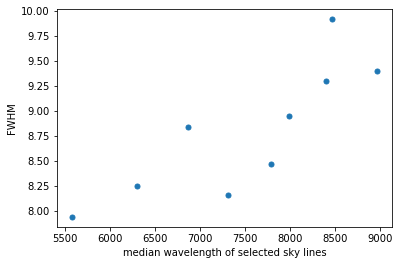

In [14]:
wav = np.zeros(len(lamda_sky_line))
fwhm = np.zeros(len(lamda_sky_line))
std = np.zeros(len(lamda_sky_line))

for i,p in enumerate(lamda_sky_line):
    wav[i] = np.median(p)
    fwhm[i] = best_fit[i].stddev.value * 2.355
    std[i] = best_fit[i].stddev.value
plt.plot(wav, fwhm, '.', ms=10)
#plt.plot(wav, std, '.', ms=10)
plt.xlabel('median wavelength of selected sky lines')
plt.ylabel('FWHM')
#plt.ylabel('std')

In [ ]:
wav = np.zeros(len(lamda_sky_line))
fwhm = np.zeros(len(lamda_sky_line))
std = np.zeros(len(lamda_sky_line))

for i,p in enumerate(lamda_sky_line):
    wav[i] = np.median(p)
    fwhm[i] = best_fit[i].stddev.value * 2.355
    std[i] = best_fit[i].stddev.value
plt.plot(wav, fwhm, '.', ms=10)
#plt.plot(wav, std, '.', ms=10)
plt.xlabel('median wavelength of selected sky lines')
plt.ylabel('FWHM')
#plt.ylabel('std')